# Project: Stears Data Analysis Assessment


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Profiling and Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction
Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/Stears Data Analysis Project/full_stears_updated_data.csv')

# Data Profiling and Wrangling

A glimpse into the dataset

In [3]:
df.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,United States
1,2,success,NGN,NG,Nigeria
2,3,abandoned,NGN,NaN,NaN
3,4,success,NGN,NG,Nigeria
4,5,abandoned,NGN,NG,Nigeria


In [4]:
df.tail()

,id,status,currency,country_code,country_name
3271,3272,abandoned,NGN,NaN,NaN
3272,3273,abandoned,NGN,NG,Nigeria
3273,3274,abandoned,NGN,NaN,NaN
3274,3275,abandoned,USD,NaN,NaN
3275,3276,success,NGN,NG,Nigeria


NB: I had done preliminary cleaning in Google sheet and Microsoft excel prior to this point. 
Since the dataset is not too large, I manually created addition feature (country_name) to aid analysis.

# Quality Issues
country_code and country_name have missing values
Empty/Null values are stored as NaN and should be identified and replaced.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3276 non-null   int64 
 1   status        3276 non-null   object
 2   currency      3276 non-null   object
 3   country_code  1960 non-null   object
 4   country_name  1962 non-null   object
dtypes: int64(1), object(4)
memory usage: 128.1+ KB


The above code gives a more detailed information about our data types.
All except the id (int64, an integer) variables (column) are object (string) data type.

In [6]:
df.isna().sum()

id                 0
status             0
currency           0
country_code    1316
country_name    1314
dtype: int64

From the above analysis, it is seen that there are a lot of missing values in the country_code and country_name columns

In [7]:
df.shape

(3276, 5)

There are 3276 observations and 5 columns

In [8]:
len(df)

3276

# Exploratory Data Analysis and Visualization

<AxesSubplot:>

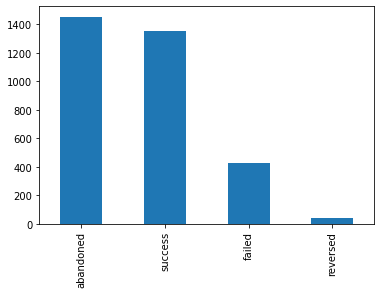

In [9]:
df['status'].value_counts().plot(kind='bar')

From the above visual, it is clear that:
1. Exactly 1,454 payments were abandoned by the customers. This accounts for 44.4% of the data.
2. Exactly 1,352 payments were successful. This accounts for 41.3% of the data.
3. Exactly 429 payments failed. This accounts for 13.1% of the data.
4. Exactly 41 payments were reversed. This accounts for 1.3% of the data.

<AxesSubplot:>

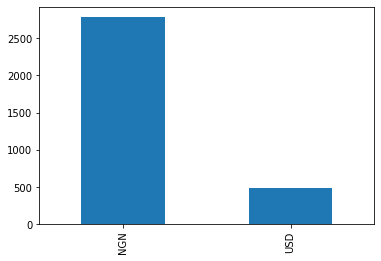

In [10]:
df['currency'].value_counts().plot(kind='bar')

From the above visual, we can see that:
1. Naira (NGN) accounted for 85.1% (2788 counts) of the total payments made for subscription.
2. Dollars (USD) accounted for 14.9 (488 counts) of the total payments made for subscription.

<AxesSubplot:>

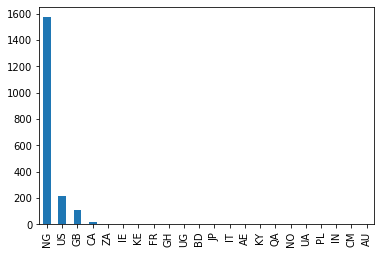

In [11]:
df['country_code'].value_counts().plot(kind='bar')

<AxesSubplot:>

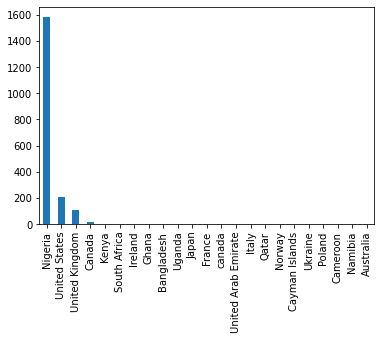

In [12]:
df['country_name'].value_counts().plot(kind='bar')

In [80]:
df.drop(['country_code'], axis=1, inplace=True)

In [81]:
df.head()

,id,status,currency,country_name
0,1,failed,USD,United States
1,2,success,NGN,Nigeria
2,3,abandoned,NGN,NaN
3,4,success,NGN,Nigeria
4,5,abandoned,NGN,Nigeria


In [82]:
df_new = df.copy()

In [83]:
df_new.status = np.where(df_new.status == "success", 1, 0)
df_new.status.value_counts()

0    1924
1    1352
Name: status, dtype: int64

In [85]:
df_new.head()

,id,status,currency,country_name
0,1,0,USD,United States
1,2,1,NGN,Nigeria
2,3,0,NGN,NaN
3,4,1,NGN,Nigeria
4,5,0,NGN,Nigeria


In [88]:

# Query all rows with Courses equals 'Spark'
df2=df.query("status == 1")
print(df2)


Empty DataFrame
Columns: [id, status, currency, country_name]
Index: []


In [94]:

# Query Rows by list of values
print(df.query("country_name in ('United Arab Emirates','Australia','Bangladesh', 'Canada','Cameroon','France','United Kingdom', 'Ghana','Ireland','India','Italy','Japan','Kenya','Cayman Islands','Namibia','Nigeria','Norway','not found','Poland','Qatar','Uganda','United States','South Africa')"))



        id     status currency   country_name
0        1     failed      USD  United States
1        2    success      NGN        Nigeria
3        4    success      NGN        Nigeria
4        5  abandoned      NGN        Nigeria
6        7    success      NGN        Nigeria
...    ...        ...      ...            ...
3266  3267    success      USD  United States
3267  3268    success      NGN        Nigeria
3270  3271  abandoned      USD         France
3272  3273  abandoned      NGN        Nigeria
3275  3276    success      NGN        Nigeria

[1957 rows x 4 columns]


In [93]:

# Query all rows with Courses equals 'Spark'
df3= df.query("country_name != 'NIgeria', currency != 'NGN'")
print(df3)

KeyError: "None of [Index([(True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, ...), (True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, ...)], dtype='object')] are in the [index]"

<AxesSubplot:xlabel='currency,country_name'>

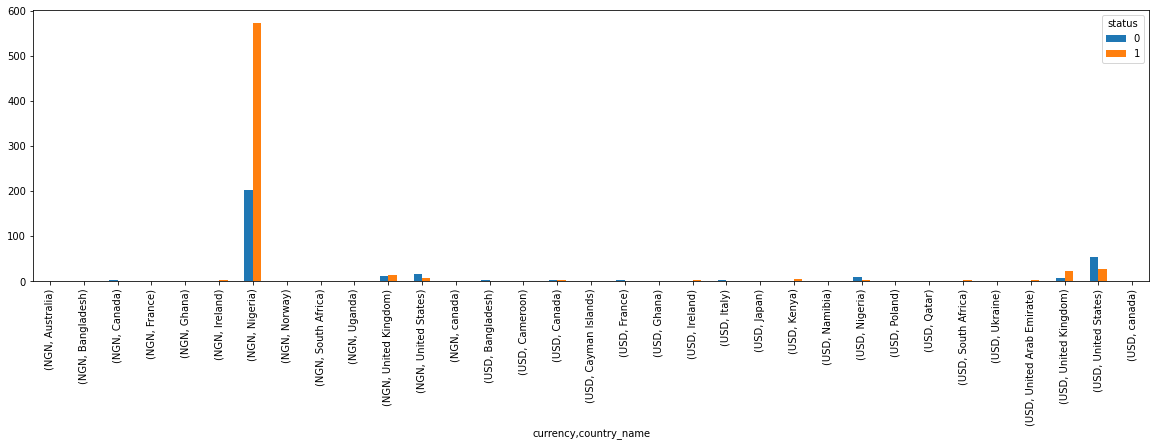

In [87]:
df_new.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name'>

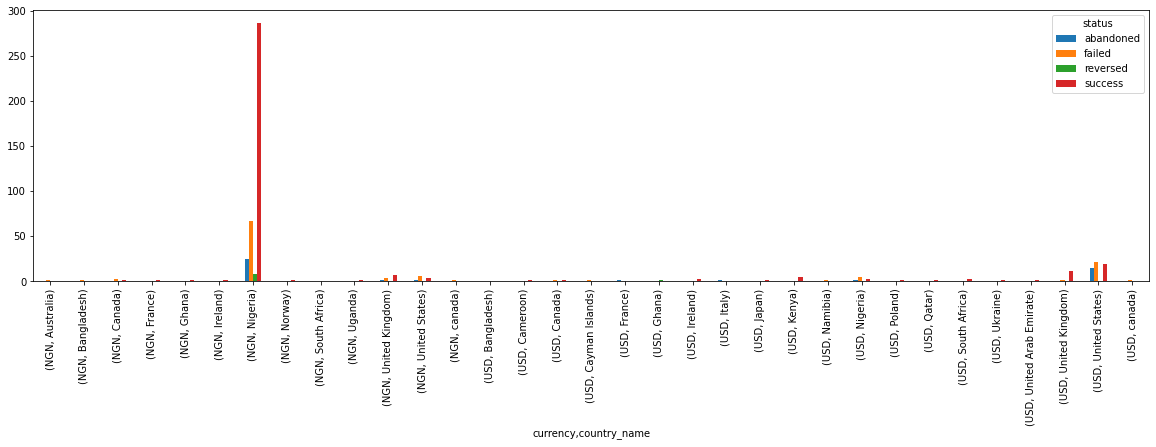

In [86]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

In [118]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [26]:
missing_value_df

NameError: name 'missing_value_df' is not defined

In [120]:
percent_not_missing = df.notnull().sum() * 100 / len(df)
not_missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_not_missing})

In [121]:
not_missing_value_df

,column_name,percent_missing
id,id,100.00000
status,status,100.00000
currency,currency,100.00000
country_code,country_code,59.82906
country_name,country_name,0.00000


From the above block of code, we can see that over 40 percent of the observations of the country_code column are missing.

In [24]:
df.nunique()

id              3276
status             4
currency           2
country_code      22
country_name      23
dtype: int64

There are only two unique currency in the data set, names NGN (Naira) and USD (Dollar)
However, there are 22 unique 

In [25]:
df.duplicated().sum()

0

There is no duplicate in our dataset

In [60]:
"""
import country_converter as coco
cc = coco.CountryConverter()

country_code = ['AE', 'AU', 'BD', 'CA', 'CM', 'FR', 'GB', 'GH', 'IE', 'IN', 'IT', 'JP', 'KE', 
                'KY', 'NA', 'NG', 'NO', 'NULL', 'PL', 'QA', 'UG', 'US', 'ZA']


# add country name by applying the convert method
df['country_name'] = df.country_code.apply(lambda x: coco.convert(names=df['country_code'], to = 'name_short'))

#country_names = cc.convert(names = country_code, to = 'name_short')
"""

"\nimport country_converter as coco\ncc = coco.CountryConverter()\n\ncountry_code = ['AE', 'AU', 'BD', 'CA', 'CM', 'FR', 'GB', 'GH', 'IE', 'IN', 'IT', 'JP', 'KE', \n                'KY', 'NA', 'NG', 'NO', 'NULL', 'PL', 'QA', 'UG', 'US', 'ZA']\n\n\n# add country name by applying the convert method\ndf['country_name'] = df.country_code.apply(lambda x: coco.convert(names=df['country_code'], to = 'name_short'))\n\n#country_names = cc.convert(names = country_code, to = 'name_short')\n"

In [61]:
"""
from datapackage import Package

package = Package('https://datahub.io/core/country-list/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())
"""

"\nfrom datapackage import Package\n\npackage = Package('https://datahub.io/core/country-list/datapackage.json')\n\n# print list of all resources:\nprint(package.resource_names)\n\n# print processed tabular data (if exists any)\nfor resource in package.resources:\n    if resource.descriptor['datahub']['type'] == 'derived/csv':\n        print(resource.read())\n"

In [ ]:
import country_converter as coco
cc = coco.CountryConverter()

country_code = ['AE', 'AU', 'BD', 'CA', 'CM', 'FR', 'GB', 'GH', 'IE', 'IN', 'IT', 'JP', 'KE', 
                'KY', 'NA', 'NG', 'NO', 'NULL', 'PL', 'QA', 'UG', 'US', 'ZA']


country_names = cc.convert(names = country_code, to = 'name_short')

NULL not found in regex


In [ ]:
country_names

['United Arab Emirates',
 'Australia',
 'Bangladesh',
 'Canada',
 'Cameroon',
 'France',
 'United Kingdom',
 'Ghana',
 'Ireland',
 'India',
 'Italy',
 'Japan',
 'Kenya',
 'Cayman Islands',
 'Namibia',
 'Nigeria',
 'Norway',
 'not found',
 'Poland',
 'Qatar',
 'Uganda',
 'United States',
 'South Africa']

In [ ]:
list1 = [country_code, country_names]

In [ ]:

df_country = pd.concat([pd.Series(x) for x in list1], axis=1)

In [ ]:
df_country

,0,1
0,AE,United Arab Emirates
1,AU,Australia
2,BD,Bangladesh
3,CA,Canada
4,CM,Cameroon
5,FR,France
6,GB,United Kingdom
7,GH,Ghana
8,IE,Ireland
9,IN,India


In [ ]:
df["country_name"] = df["country_code"].apply(lambda country_names: country_names)


In [ ]:
df.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,US
1,2,success,NGN,NG,NG
2,3,abandoned,NGN,NaN,NaN
3,4,success,NGN,NG,NG
4,5,abandoned,NGN,NG,NG


<AxesSubplot:xlabel='currency,country_name'>

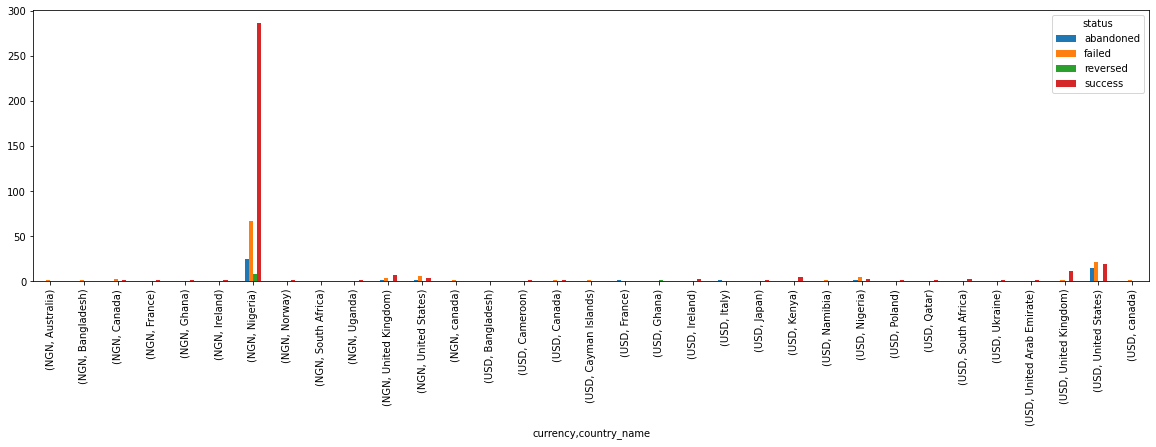

In [62]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

As shown above, there is no duplicate in our data.

In [ ]:
# A functionthat finds the median of the values it receives
import numpy as np

def median(values):
    n = len(values)
    s = sorted(values)
    return (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n%2] if n else None

values = [1, 2, 6]
print(median(values))

2


In [ ]:
import numpy as np

def median(values):
    n = len(values)
    s = sorted(values)
    return np.median([s])

values = [1, 2, 6]
print(median(values))

2.0


In [ ]:
students = [("Allen Anderson", "Computer Science"),
            ("Edgar Einstein", "Engineering"),
            ("Farrah Finn", "Fine Arts")]
     

def add_new_student(students, name, major):
    students.append((name, major))

def update_student(students, index, name, major):
    students[index] = (name, major)

def find_students_by_name(students, name):
    return [student for student in students if name in student[0]]

def get_all_majors(students):
    return [student[1] for student in students]




In [ ]:
get_all_majors(students)

['Computer Science', 'Engineering', 'Fine Arts']

In [ ]:
get_all_majors(students)

['Computer Science', 'Engineering', 'Fine Arts']

In [ ]:
find_students_by_name(students, 'in') 

[('Edgar Einstein', 'Engineering'), ('Farrah Finn', 'Fine Arts')]

In [ ]:
#add_new_student("Farrah Finn", "Enoch", "Fine Arts")

In [ ]:
"""
Implement a group_by_owners function that:

Accepts a dictionary containing the file owner name for each file name.
Returns a dictionary containing a list of file names for each owner name, in any order.
For example, for dictionary {'Input.txt': 'Randy', 'Code.py': 'Stan', 'Output.txt': 'Randy'} the group_by_owners function should return {'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']}.


def group_by_owners(files):
    return None

if __name__ == "__main__":    
    files = {
        'Input.txt': 'Randy',
        'Code.py': 'Stan',
        'Output.txt': 'Randy'
    }   
    print(group_by_owners(files))
"""

from collections import defaultdict


def group_by_owners(files):
    owners = defaultdict(list)
    for file, owner in files.items():
        owners[owner].append(file)
    return owners


files = {
    'Input.txt': 'Randy',
    'Code.py': 'Stan',
    'Output.txt': 'Randy'
}
print(group_by_owners(files))

defaultdict(<class 'list'>, {'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']})
